In [1]:
import sys
sys.path.append('../../src')
from modules import *
from columns import *
sys.path.append('../../src/python')
from random_funks import *

## KONCENTRACIJE

In [2]:
df_concentration = pd.read_excel("../../data/VEGA_QSAR_modeli/concentration_results.xlsx", sheet_name="Concentration", index_col=0)

## TOKSIČNOST

In [3]:
# treba mi TU_sed 28x35
TU_sed_FM=pd.read_csv('../../data/VEGA_QSAR_modeli/TU_sed_FM.csv', index_col=0).transpose()
TU_sed_DM=pd.read_csv('../../data/VEGA_QSAR_modeli/TU_sed_DM.csv', index_col=0).transpose()
TU_sed_FA=pd.read_csv('../../data/VEGA_QSAR_modeli/TU_sed_FA.csv', index_col=0).transpose()

In [4]:
df_toxicity = (TU_sed_FM + TU_sed_DM + TU_sed_FA) / 3

In [5]:
# Definiranje i pozivanje funkcije `print_outliers`
def print_outliers(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtriranje outlier-a
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        if not outliers.empty:
            print(f"Outlieri za {column}:")
            for index, row in outliers.iterrows():
                print(f"Lokacija: {index}, Vrijednost: {row[column]}")
            print("\n")  # Dodaje praznu liniju za bolju preglednost

print_outliers(df_toxicity.T)

Outlieri za Flu:
Lokacija: centar Karlovca - Kupa, Vrijednost: 1.9682613824130975e-05
Lokacija: Metković-most - Neretva, Vrijednost: 1.0676585955528975e-05
Lokacija: Petrinja (kupalište) - Kupa, Vrijednost: 1.3944234506648762e-05
Lokacija: Zagreb (Savski Kamenji - toplana) - Sava, Vrijednost: 2.1791497727708134e-05


Outlieri za Pir:
Lokacija: centar Karlovca - Kupa, Vrijednost: 2.2231126194176513e-06
Lokacija: Metković-most - Neretva, Vrijednost: 1.247718470198612e-06
Lokacija: Petrinja (kupalište) - Kupa, Vrijednost: 1.8587277172938632e-06
Lokacija: Zagreb (Savski Kamenji - toplana) - Sava, Vrijednost: 2.9414935304897233e-06


Outlieri za BaA:
Lokacija: centar Karlovca - Kupa, Vrijednost: 6.967274356217946e-07
Lokacija: Metković-most - Neretva, Vrijednost: 3.959511083762919e-07
Lokacija: Petrinja (kupalište) - Kupa, Vrijednost: 5.71168781145782e-07
Lokacija: Zagreb (Savski Kamenji - toplana) - Sava, Vrijednost: 9.505802272421423e-07


Outlieri za Kri:
Lokacija: centar Karlovca - Kupa

In [6]:
# Skaliranje podataka
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_toxicity)
scaled_data_transposed = scaled_data.T

In [7]:
scaled_data_transposed 

array([[ 4.33778847e+00,  4.43889870e-01, -3.14272742e-01,
        -1.07856528e-01,  4.19059527e-01,  3.42153259e+00,
        -7.85346747e-02, -2.61172584e-01, -3.43289725e-01,
        -2.03318139e-01,  9.11032055e-01, -3.65765040e-01,
        -1.44949747e-01, -9.57698254e-02, -3.17079474e-01,
        -3.55000658e-01, -3.66106774e-01, -3.64882451e-01,
        -3.58483225e-01, -3.65664836e-01, -3.66006896e-01,
        -3.66049434e-01, -3.66134453e-01, -3.66133090e-01,
        -3.66186931e-01, -3.65803765e-01, -3.65831473e-01,
        -3.66075699e-01, -3.66069798e-01, -3.66051259e-01,
        -3.66146733e-01, -3.66144865e-01, -3.66145600e-01,
        -3.66185442e-01, -3.66190651e-01],
       [ 2.97322359e+00,  3.87624703e-01, -3.39936486e-01,
         2.57652274e-01, -2.06270178e-01,  4.67968396e+00,
        -1.33185095e-01, -3.36297222e-01, -3.21447638e-01,
        -1.48743535e-01,  9.03712864e-01, -3.63020492e-01,
        -9.28923421e-02, -1.78920822e-01,  1.52903315e-01,
        -3.49

In [8]:
TU_site = pd.read_csv('../../data/VEGA_QSAR_modeli/LC50_toks_average.csv')

In [9]:
TU_site.index = df_toxicity.transpose().index

In [10]:
TU_site

LOKACIJA  \
Kuželj-Gorski kotar - Kupa                                                        Kuželj-Gorski kotar   
Iševnica- Gorski kotar - Kupica                                                Iševnica- Gorski kotar   
centar Karlovca - Kupa                                                                centar Karlovca   
ušće u Kupu - Korana                                                                      ušće u Kupu   
Zagrebačka županija - Kupčina                                                     Zagrebačka županija   
Stubičke Toplice - Vidak                                                             Stubičke Toplice   
 Istra - Mirna                                                                                  Istra   
 Istra - Mala Huba                                                                              Istra   
 Istra - Boljunčica                                                                             Istra   
Jurovo - Jurovski Brod (utok Lahinje - lijevi p...  Jurovo - Jurovski Brod (utok Lahinje - lijevi ...   
Ozalj - Kupa                                                                                    Ozalj   
Metković-Doljani - Neretva                                                           Metković-Doljani   
Metković-Unka - Neretva                                                                 Metković-Unka   
Metković-most - Neretva                                                                 Metković-most   
ušće - Neretva                                                                                   ušće   
Mijači - Orljava                                                                               Mijači   
Striježevica - Brzaja                                                                    Striježevica   
Petrinja (kupalište) - Kupa                                                      Petrinja (kupalište)   
Sisak (Stari grad) - Kupa                                                          Sisak (Stari grad)   
Sisak (Stari grad) - Sava                                                          Sisak (Stari grad)   
Zagreb (Savski Kamenji - toplana) - Sava                            Zagreb (Savski Kamenji - toplana)   
Prošćansko jezero - Plitvička jezera                                                Prošćansko jezero   
Belavići-kamp Slapić - Mrežnica                                                  Belavići-kamp Slapić   
Duga Resa-gradsko kupalište - Mrežnica                                    Duga Resa-gradsko kupalište   
Severin na Kupi-kupalište Klanac - Kupa                              Severin na Kupi-kupalište Klanac   
Ozalj-gradsko kupalište - Kupa                                                Ozalj-gradsko kupalište   
Slunj-kupalište Rastoke - Korana                                              Slunj-kupalište Rastoke   
Karlovac-Foginovo kupalište - Korana                                      Karlovac-Foginovo kupalište   

                                                               RIJEKA  \
Kuželj-Gorski kotar - Kupa                                       Kupa   
Iševnica- Gorski kotar - Kupica                                Kupica   
centar Karlovca - Kupa                                           Kupa   
ušće u Kupu - Korana                                           Korana   
Zagrebačka županija - Kupčina                                 Kupčina   
Stubičke Toplice - Vidak                                        Vidak   
 Istra - Mirna                                                  Mirna   
 Istra - Mala Huba                                          Mala Huba   
 Istra - Boljunčica                                        Boljunčica   
Jurovo - Jurovski Brod (utok Lahinje - lijevi p...              Kupa    
Ozalj - Kupa                                                    Kupa    
Metković-Doljani - Neretva                                    Neretva   
Metković-Unka - Neretva                                       Neretva   
Metković-most - Neretva  

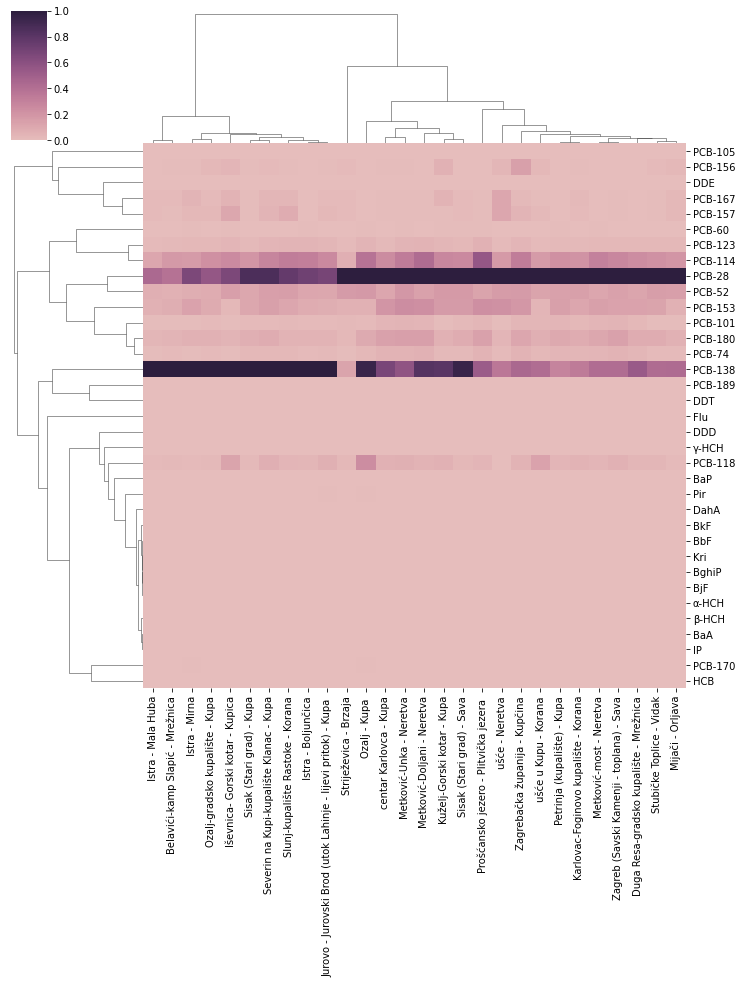

In [11]:
kols=PCB_kol+PAH_kol+OCP_kol
molecule_names = kols

# Definirajte funkciju koja će se koristiti za oznake listova
def llf(id):
    return molecule_names[id]
# funkcija koja će se koristiti za oznake listova
def lllf(index_lokacija, index_rijeka):
    naziv_lokacije = TU_site['LOKACIJA'].iloc[index_lokacija]
    naziv_rijeka = TU_site['RIJEKA'].iloc[index_rijeka]
    return f"{naziv_lokacije} - {naziv_rijeka}"

custom_cmap = sns.cubehelix_palette(as_cmap=True)

# Stvaranje clustermape
g = sns.clustermap(scaled_data, metric="correlation", standard_scale=1, cmap=custom_cmap, center=0.45)

# Promjena oznaka y-os
new_y_labels = [llf(int(idx.get_text())) for idx in g.ax_heatmap.yaxis.get_majorticklabels()]
g.ax_heatmap.set_yticklabels(new_y_labels, rotation=0)

# Promjena oznaka x-os
new_x_labels = [lllf(int(idx.get_text()), int(idx.get_text())) for idx in g.ax_heatmap.xaxis.get_majorticklabels()]
g.ax_heatmap.set_xticklabels(new_x_labels, rotation=90)


#plt.figure(figsize=(30, 30))  # Postavite željene dimenzije slike (širina x visina)
plt.savefig('../../data/VEGA_QSAR_modeli/dendrogram_toks.svg', format='svg', bbox_inches='tight')


plt.show()

## PBT

In [12]:
df_PBT = pd.read_excel("../../data/VEGA_QSAR_modeli/PBT_results.xlsx", sheet_name="PBT_rel", index_col=0)

In [13]:
df_PBTC = pd.read_excel("../../data/VEGA_QSAR_modeli/PBTC_results.xlsx", sheet_name="PBTC", index_col=0)

In [14]:
# Skaliranje podataka
scaler = StandardScaler()
scaled_data_PBTC = scaler.fit_transform(df_PBTC)
scaled_data_transposed = scaled_data.T

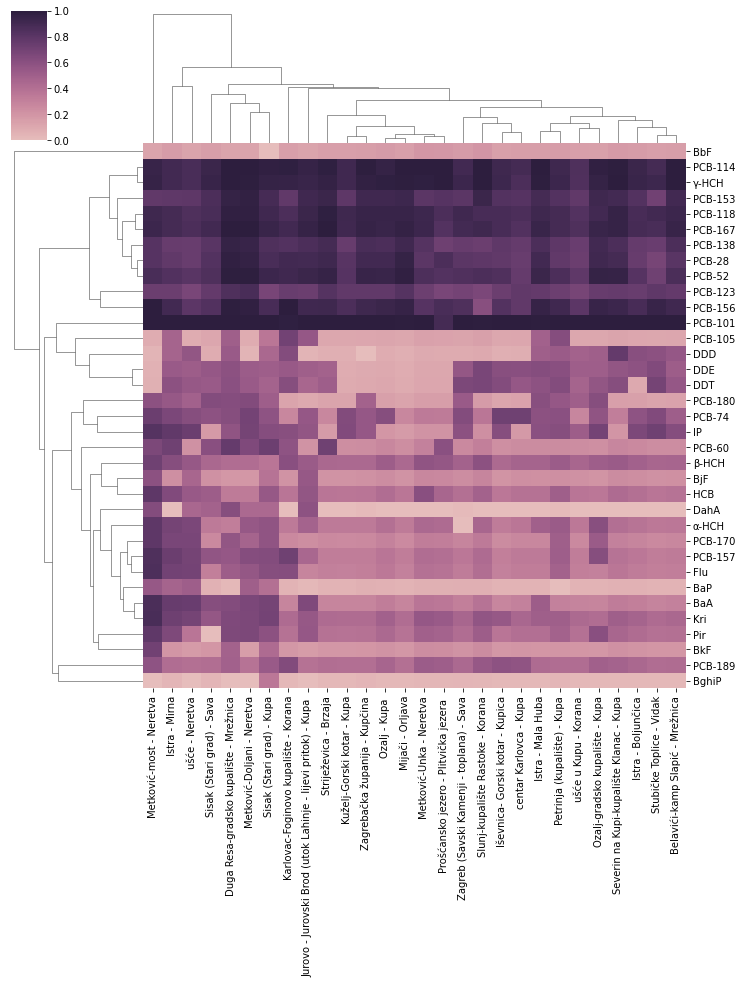

In [15]:
molecule_names = kols

# Definirajte funkciju koja će se koristiti za oznake listova
def llf(id):
    return molecule_names[id]
# funkcija koja će se koristiti za oznake listova
def lllf(index_lokacija, index_rijeka):
    naziv_lokacije = TU_site['LOKACIJA'].iloc[index_lokacija]
    naziv_rijeka = TU_site['RIJEKA'].iloc[index_rijeka]
    return f"{naziv_lokacije} - {naziv_rijeka}"

custom_cmap = sns.cubehelix_palette(as_cmap=True)

# Stvaranje clustermape
g = sns.clustermap(scaled_data_PBTC, metric="correlation", standard_scale=1, cmap=custom_cmap, center=0.45)

# Promjena oznaka y-os
new_y_labels = [llf(int(idx.get_text())) for idx in g.ax_heatmap.yaxis.get_majorticklabels()]
g.ax_heatmap.set_yticklabels(new_y_labels, rotation=0)

# Promjena oznaka x-os
new_x_labels = [lllf(int(idx.get_text()), int(idx.get_text())) for idx in g.ax_heatmap.xaxis.get_majorticklabels()]
g.ax_heatmap.set_xticklabels(new_x_labels, rotation=90)


#plt.figure(figsize=(30, 30))  # Postavite željene dimenzije slike (širina x visina)
plt.savefig('../../data/VEGA_QSAR_modeli/dendrogram_PBTC.svg', format='svg', bbox_inches='tight')

plt.show()

# SPERMAN KORELACIJE

In [16]:
from scipy.stats import spearmanr

In [17]:
kols=PAH_kol+OCP_kol+PCB_kol
molecule_names = kols

In [18]:
correlation_results = pd.DataFrame(index=molecule_names, 
                                   columns=['Toxicity_Concentration'])

# Dodajemo kolone za p-vrijednosti u DataFrame correlation_results
correlation_results['Toxicity_Concentration_p'] = None

# Petlja za izračun Spearmanovih korelacija i p-vrijednosti za svaku molekulu
for i, name in enumerate(molecule_names):
    # Izračun korelacije i p-vrijednosti između toksičnosti i koncentracija
    corr, p_value = spearmanr(df_toxicity.iloc[i, :], df_concentration.iloc[i, :])
    correlation_results.at[name, 'Toxicity_Concentration'] = corr
    correlation_results.at[name, 'Toxicity_Concentration_p'] = p_value

# Pretvaranje vrijednosti u numerički format za analizu
correlation_results = correlation_results.astype(float)

# Prikaz ažuriranih rezultata korelacija i p-vrijednosti
correlation_results

/home/ivana/repozitorij/diplomski/ivana_dip/dipenv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Toxicity_Concentration  Toxicity_Concentration_p
Flu                    0.617953              4.581499e-04
Pir                    0.586207              1.045028e-03
BaA                    0.736727              7.807386e-06
Kri                    0.750958              4.144622e-06
BjF                    0.777337              1.138795e-06
BbF                    0.657362              1.442890e-04
BkF                    0.749863              4.357912e-06
BaP                    0.748597              4.616833e-06
DahA                   0.644676              2.130070e-04
BghiP                  0.613027              5.236905e-04
IP                     0.672687              8.794162e-05
HCB                    0.386899              4.195920e-02
α-HCH                  0.589268              9.687159e-04
β-HCH                  0.674687              8.226779e-05
γ-HCH                  0.527480              3.920135e-03
DDE                    0.688234              5.164902e-05
DDD                    0.551414              2.354096e-03
DDT                    0.740382              6.661001e-06
PCB-28                 0.800119              3.218957e-07
PCB-52                 0.464703              1.272224e-02
PCB-101                0.775821              1.232239e-06
PCB-118                0.673611              8.527958e-05
PCB-153                0.706128              2.686130e-05
PCB-138                0.741803              6.257755e-06
PCB-180                0.511380              5.414437e-03
PCB-74                 0.493020              7.683075e-03
PCB-60                 0.678292              7.285111e-05
PCB-123                0.716725              1.782661e-05
PCB-114                0.518976              4.658198e-03
PCB-105                0.710194              2.299966e-05
PCB-167                0.433245              2.127740e-02
PCB-156                0.149751              4.469056e-01
PCB-157                     NaN                       NaN
PCB-170                0.332145              8.419877e-02
PCB-189                0.011916              9.520132e-01

In [19]:
# Scatter plot for Toxicity vs. Concentration
#plt.figure(figsize=(12, 8))
#sns.scatterplot(x=correlation_results.index, y='Toxicity_Concentration', data=correlation_results, color='blue', label='Toxicity-Concentration')
#plt.title('Spearman Correlation: Toxicity vs. Concentration')
#plt.xlabel('Molecule')
#plt.ylabel('Spearman Correlation')
#plt.xticks(rotation=90)  # Rotate molecule names for better readability
#plt.legend()
#plt.grid(True)
#plt.tight_layout()  # Adjust layout to make room for the rotated x-tick labels
#plt.show()

# Scatter plot for Toxicity vs. PBT
#plt.figure(figsize=(12, 8))
#sns.scatterplot(x=correlation_results.index, y='Toxicity_PBT', data=correlation_results, color='red', label='Toxicity-PBT')
#plt.title('Spearman Correlation: Toxicity vs. PBT')
#plt.xlabel('Molecule')
#plt.ylabel('Spearman Correlation')
#plt.xticks(rotation=90)  # Rotate molecule names for better readability
#plt.legend()
#plt.grid(True)
#plt.tight_layout()  # Adjust layout to make room for the rotated x-tick labels
#plt.show()


In [20]:
# Primjena negativnog logaritma na p-vrijednosti za skaliranje veličine točaka
# Dodajemo mali offset kako bismo izbjegli log(0) za vrlo male p-vrijednosti
#offset = 1e-10
#size_concentration = -np.log(correlation_results['Toxicity_Concentration_p'] + offset) * 100  # Skaliranje veličine
#size_pbt = -np.log(correlation_results['Toxicity_PBT_p'] + offset) * 100  # Skaliranje veličine

#plt.figure(figsize=(14, 10))

# Scatter plot za Toxicity vs. Concentration s veličinom točaka baziranom na log(p-vrijednosti)
#plt.scatter(correlation_results.index, correlation_results['Toxicity_Concentration'], s=size_concentration, color='blue', alpha=0.5, label='Toxicity-Concentration', edgecolors='w')

# Scatter plot za Toxicity vs. PBT s veličinom točaka baziranom na log(p-vrijednosti)
#plt.scatter(correlation_results.index, correlation_results['Toxicity_PBT'], s=size_pbt, color='red', alpha=0.5, label='Toxicity-PBT', edgecolors='w')

#plt.title('Spearman Correlation: Toxicity with Concentration (Log-Scaled p-values)')
#plt.xlabel('Molekula')
#plt.ylabel('Spearmanova Korelacija')
#plt.xticks(rotation=90)
#plt.legend()
#plt.grid(True)
#plt.tight_layout()
#plt.show()

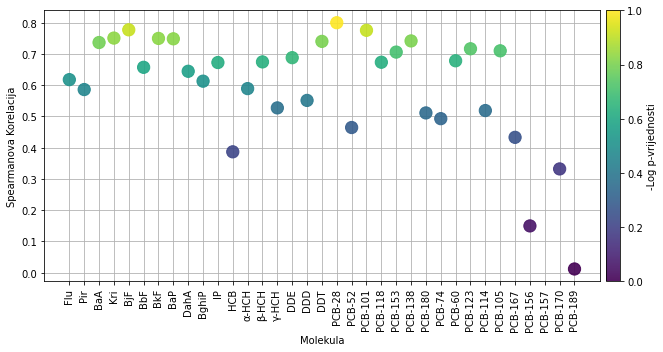

In [21]:
# Dodajemo mali offset kako bismo izbjegli log(0) za vrlo male p-vrijednosti
offset = 1e-10
# Izračun log p-vrijednosti
log_p_values = -np.log(correlation_results['Toxicity_Concentration_p'] + offset)

# Mapiranje log p-vrijednosti na boje
colors = plt.cm.viridis(log_p_values / log_p_values.max())

plt.figure(figsize=(10, 5))

# Scatter plot, gdje boja predstavlja log p-vrijednosti
scatter = plt.scatter(correlation_results.index, correlation_results['Toxicity_Concentration'], 
                      c=colors, s=150,alpha =0.9, label='Log p-vrijednosti', zorder=3)

# Legenda koja pokazuje log p-vrijednosti
cbar = plt.colorbar(scatter, pad=0.01)
cbar.set_label('-Log p-vrijednosti')


plt.xlabel('Molekula')
plt.ylabel('Spearmanova Korelacija')
plt.xticks(rotation=90)
#plt.title('Korelacija Toksičnosti i Koncentracije s Bojom prema Log p-vrijednostima')
plt.grid(True, zorder=2)
plt.tight_layout()


#plt.figure(figsize=(30, 30))  # Postavite željene dimenzije slike (širina x visina)
plt.savefig('../../data/VEGA_QSAR_modeli/Sperman korelacije toks i konc.png', dpi=600, bbox_inches='tight')  # Postavite razlučivost (dpi)

plt.show()

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the correlation results to a numeric type, as they may have been stored as objects
#correlation_results = correlation_results.astype(float)

# Creating a heatmap
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_results, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Spearman Correlation between Toxicity and Concentration')
#plt.ylabel('Molecule Index')
#plt.xticks(rotation=45)
#plt.show()


# KARTA

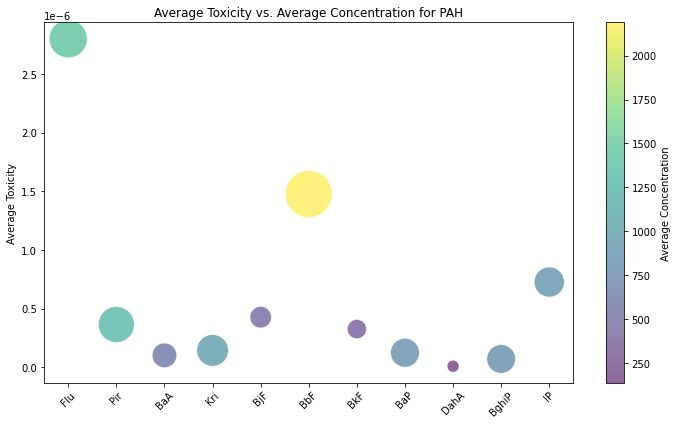

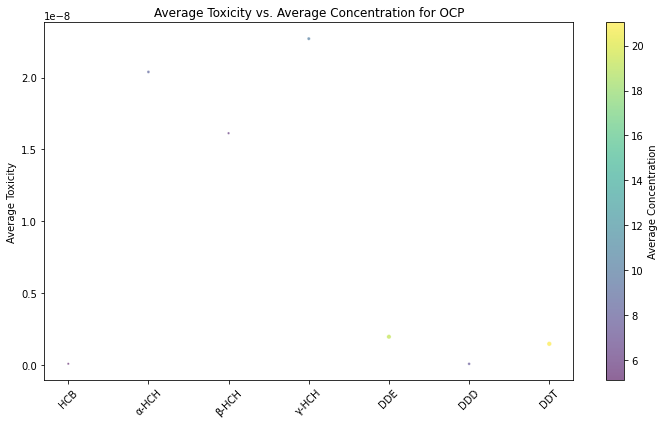

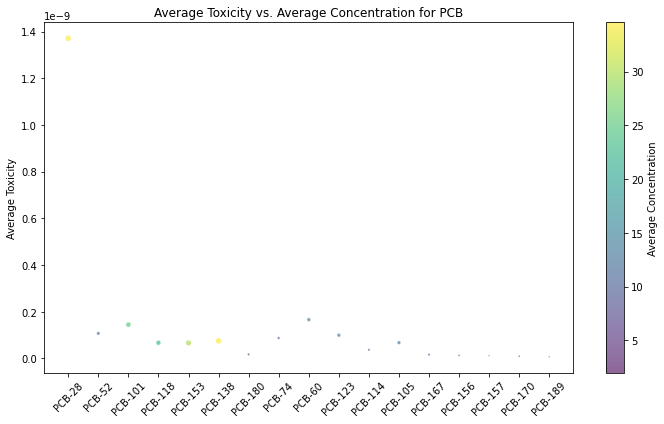

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def plot_group_data(df_concentration, df_toxicity, group_name, group_molecules):
    # Pretpostavimo da group_molecules sadrži listu molekula za određenu grupu
    # Filtriramo DataFrame-ove za molekule unutar odabrane grupe
    df_group_concentration = df_concentration.loc[group_molecules]
    df_group_toxicity = df_toxicity.loc[group_molecules]
    
    # Agregiramo podatke za svaku molekulu preko svih lokacija
    # Ovdje koristimo prosječne vrijednosti, ali možete odabrati drugačiju metodu agregacije
    avg_concentration = df_group_concentration.mean(axis=1)
    avg_toxicity = df_group_toxicity.mean(axis=1)
    
    # Veličina točaka bazirana na prosječnoj koncentraciji, možda trebate prilagoditi faktor za skaliranje
    sizes = avg_concentration * 100  # Prilagodite faktor skaliranja prema potrebi

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(avg_toxicity.index, avg_toxicity, s=sizes, c=sizes, cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)
    plt.colorbar(scatter, label='Average Concentration')
    plt.xticks(rotation=45)
    plt.ylabel('Average Toxicity')
    plt.title(f'Average Toxicity vs. Average Concentration for {group_name}')
    plt.tight_layout()
    plt.show()


# Generirajte grafikone
plot_group_data(df_concentration, df_toxicity, 'PAH', PAH_kol)
plot_group_data(df_concentration, df_toxicity, 'OCP', OCP_kol)
plot_group_data(df_concentration, df_toxicity, 'PCB', PCB_kol)


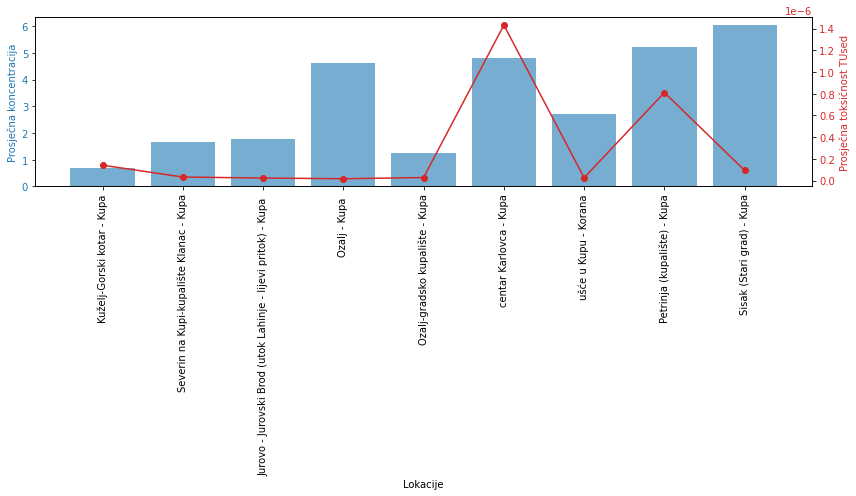

<Figure size 432x288 with 0 Axes>

In [24]:
# Definiranje željenog redoslijeda lokacija
kupa_locations = [
    "Kuželj-Gorski kotar - Kupa",
    "Severin na Kupi-kupalište Klanac - Kupa",
    "Jurovo - Jurovski Brod (utok Lahinje - lijevi pritok) - Kupa ",
    "Ozalj - Kupa ",
    "Ozalj-gradsko kupalište - Kupa",
    "centar Karlovca - Kupa",
    "ušće u Kupu - Korana",
    "Petrinja (kupalište) - Kupa",
    "Sisak (Stari grad) - Kupa"
]

# Nastavak s funkcijom za vizualizaciju
def plot_data_for_locations_with_histogram(locations, avg_concentration, avg_toxicity, group_name):
    fig, ax1 = plt.subplots(figsize=(12, 7))
    
    # Crtanje histograma za prosječne koncentracije
    ax1.bar(locations, avg_concentration, color='tab:blue', label='Average Concentration', alpha=0.6)
    ax1.set_xlabel('Lokacije')
    ax1.set_ylabel('Prosječna koncentracija', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.tick_params(axis='x', rotation=90)
    
    # Stvaranje drugog y-osa za prosječne toksičnosti
    ax2 = ax1.twinx()
    ax2.plot(locations, avg_toxicity, color='tab:red', marker='o', linestyle='-', label='Average Toxicity')
    ax2.set_ylabel('Prosječna toksičnost TUsed', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    
    # Obrtanje skale na y-osi za toksičnost
    #ax2.invert_yaxis()

    #plt.title(f'Prosječne koncentracije i toksičnost za rijeku {group_name} po lokacijama')
    fig.tight_layout()
    plt.show()
    


# Filtriranje DataFrame-a za koncentraciju i toksičnost koristeći definirane lokacije
df_concentration_kupa = df_concentration[kupa_locations]
df_toxicity_kupa = df_toxicity[kupa_locations]


# Izračunavanje prosječnih vrijednosti za filtrirane lokacije i crtanje grafikona
plot_data_for_locations_with_histogram(kupa_locations, df_concentration_kupa.mean(), df_toxicity_kupa.mean(), "Kupa")

#plt.figure(figsize=(30, 30))  # Postavite željene dimenzije slike (širina x visina)
plt.savefig('../../data/VEGA_QSAR_modeli/Kupa_ukupno.png', dpi=600, bbox_inches='tight') 

In [25]:
df_concentration_transposed = df_concentration.T
df_toxicity_transposed = df_toxicity.T

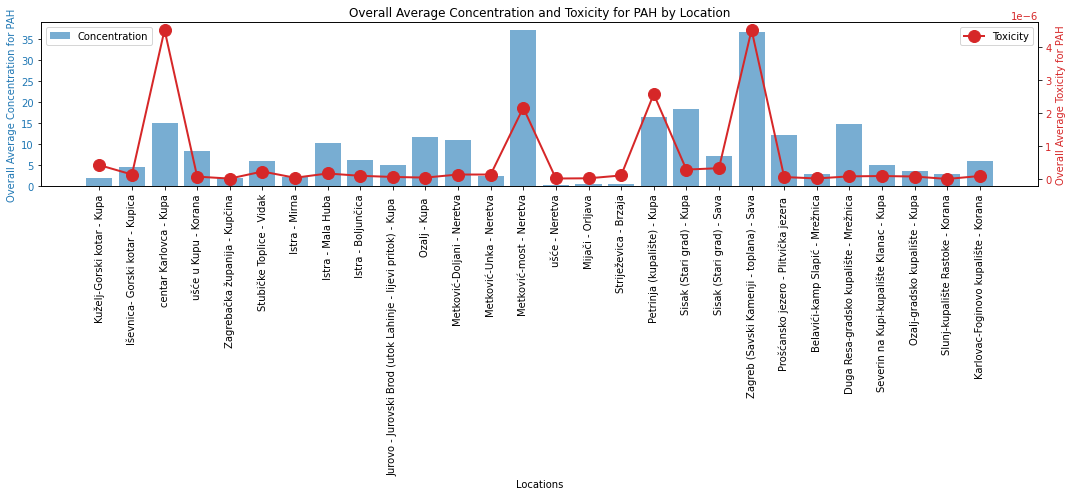

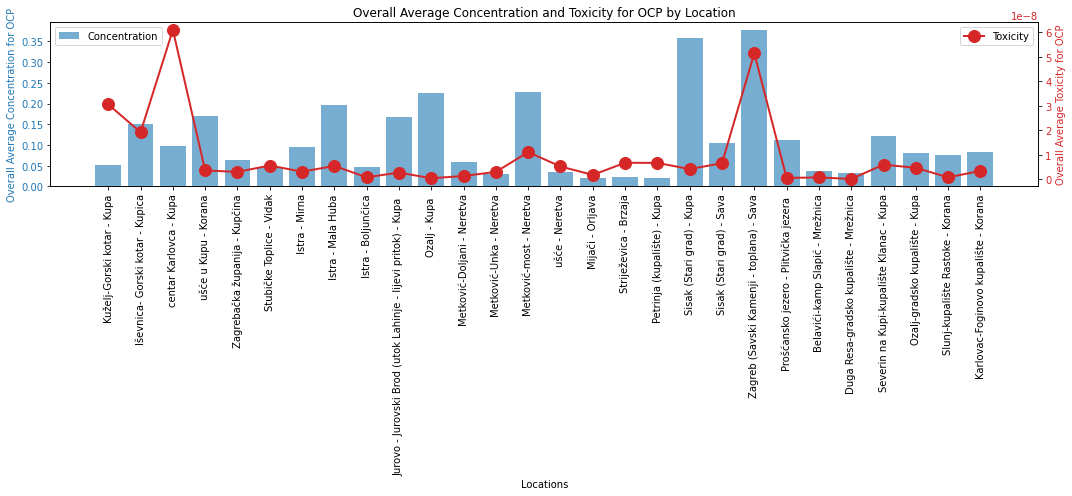

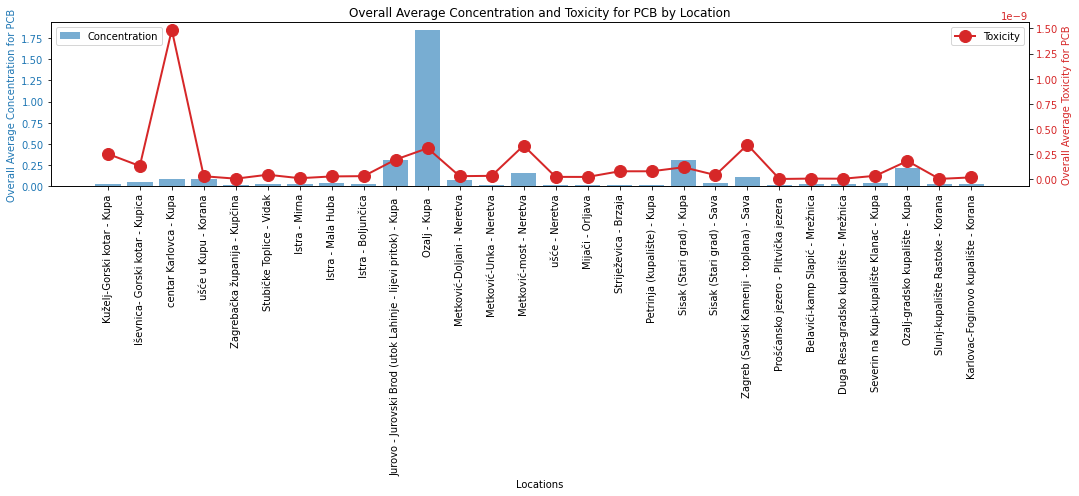

In [26]:
def plot_overall_averages_for_group(df_concentration, df_toxicity, group_columns, locations, group_name):
    # Filtriranje DataFrame-ova za grupu spojeva
    df_concentration_filtered = df_concentration[group_columns]
    df_toxicity_filtered = df_toxicity[group_columns]
    
    # Izračunavanje prosječnih vrijednosti za filtrirane DataFrame-ove
    overall_avg_concentration = df_concentration_filtered.mean(axis=1)
    overall_avg_toxicity = df_toxicity_filtered.mean(axis=1)
    
    # Vizualizacija
    fig, ax1 = plt.subplots(figsize=(15, 7))

    color = 'tab:blue'
    ax1.set_xlabel('Locations')
    ax1.set_ylabel(f'Overall Average Concentration for {group_name}', color=color)
    ax1.bar(locations, overall_avg_concentration, color=color, alpha=0.6, label='Concentration')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel(f'Overall Average Toxicity for {group_name}', color=color)
    ax2.plot(locations, overall_avg_toxicity, color=color, marker='o', linestyle='-', linewidth=2, markersize=12, label='Toxicity')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f'Overall Average Concentration and Toxicity for {group_name} by Location')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    ax1.set_xticks(np.arange(len(locations)))
    ax1.set_xticklabels(locations, rotation=90)
    
    fig.tight_layout()
    plt.show()

# Pretpostavljamo da su 'df_concentration' i 'df_toxicity' već transponirani
locations = df_concentration_transposed.index.tolist()
groups = [('PAH', PAH_kol), ('OCP', OCP_kol), ('PCB', PCB_kol)]

for group_name, group_columns in groups:
    plot_overall_averages_for_group(df_concentration_transposed, df_toxicity_transposed, group_columns, locations, group_name)


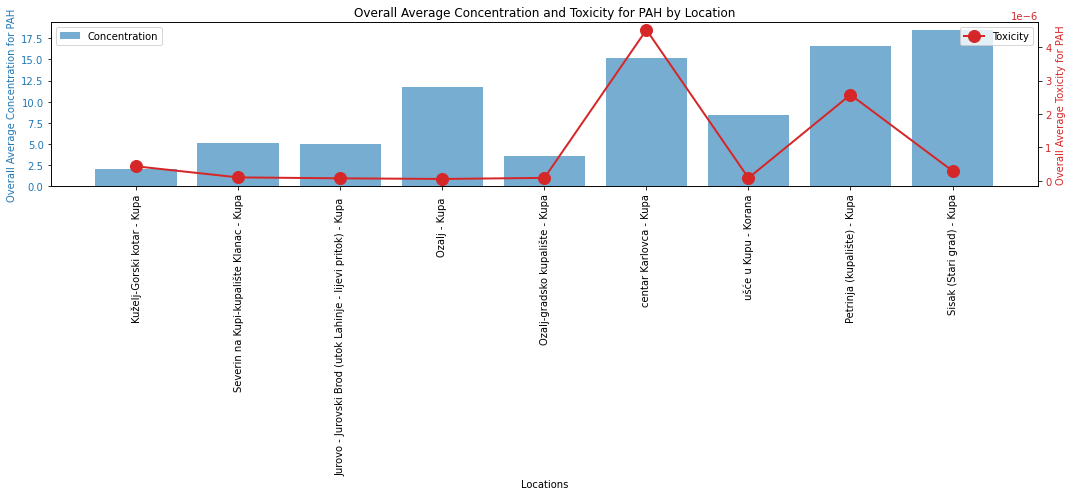

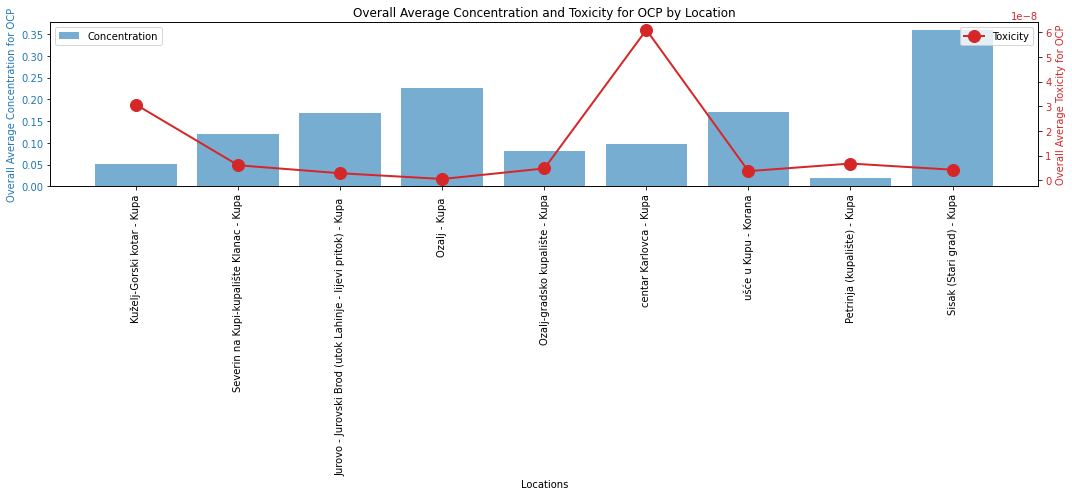

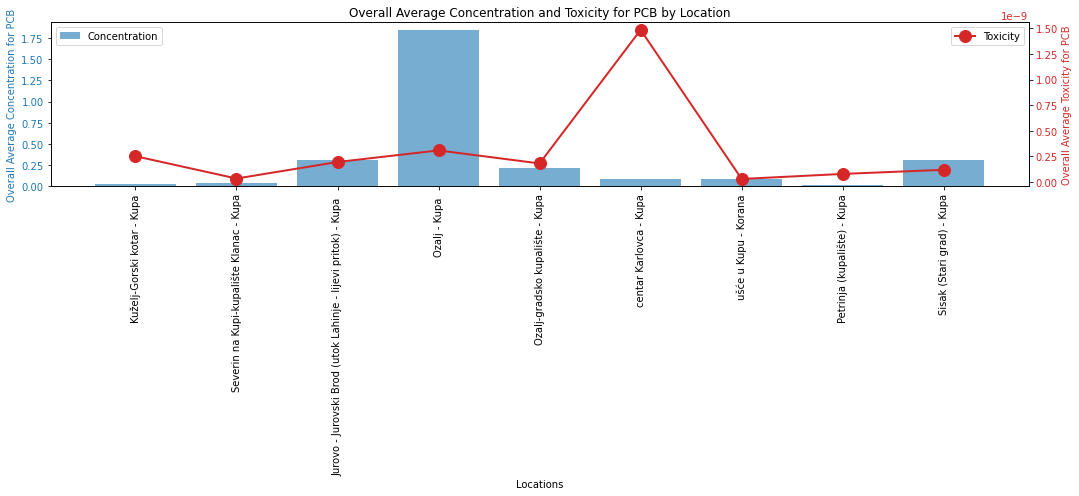

In [27]:
# Pretpostavka je da su df_concentration i df_toxicity već transponirani i dostupni

# Filtriranje transponiranih DataFrame-ova za odabrane lokacije
df_concentration_transposed_filtered = df_concentration_transposed.loc[kupa_locations]
df_toxicity_transposed_filtered = df_toxicity_transposed.loc[kupa_locations]

# Prilagođavanje funkcije za plotovanje kako bi se koristila filtrirana DataFrame-a
#def plot_overall_averages_for_group_filtered(df_concentration, df_toxicity, group_columns, locations, group_name):
    # Sličan kod kao prije, ali sada koristi df_concentration i df_toxicity koji su već filtrirani za lokacije
    # Ovaj kod je isti kao u prethodnom primjeru, samo koristi filtrirane DataFrame-ove

# Koristite izmijenjenu funkciju za plotovanje za svaku grupu spojeva
for group_name, group_columns in groups:
    plot_overall_averages_for_group(df_concentration_transposed_filtered, df_toxicity_transposed_filtered, group_columns, kupa_locations, group_name)


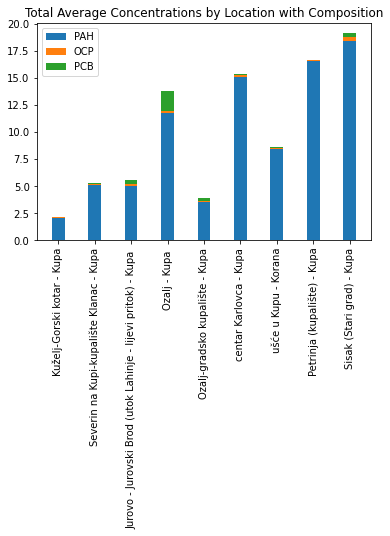

In [28]:
def plot_stacked_averages(df, locations, PAH_kol, OCP_kol, PCB_kol):
    # Filtriranje df samo za željene lokacije
    df_filtered = df.loc[locations]

    # Izračunavanje prosječnih koncentracija za svaku grupu spojeva
    avg_PAH = df_filtered[PAH_kol].mean(axis=1)
    avg_OCP = df_filtered[OCP_kol].mean(axis=1)
    avg_PCB = df_filtered[PCB_kol].mean(axis=1)
    
    # Podešavanje x lokacija za grupe
    ind = np.arange(len(locations))  # x lokacije za grupe
    width = 0.35  # širina barova
    
    fig, ax = plt.subplots()
    
    # Crtanje barova
    ax.bar(ind, avg_PAH, width, label='PAH')
    ax.bar(ind, avg_OCP, width, bottom=avg_PAH, label='OCP')  # OCP se dodaje na PAH
    ax.bar(ind, avg_PCB, width, bottom=avg_PAH+avg_OCP, label='PCB')  # PCB se dodaje na PAH+OCP
    
    ax.set_title('Total Average Concentrations by Location with Composition')
    ax.set_xticks(ind)
    ax.set_xticklabels(locations, rotation=90)
    ax.legend()
    
    plt.show()

# Pozivanje funkcije
plot_stacked_averages(df_concentration_transposed, kupa_locations, PAH_kol, OCP_kol, PCB_kol)


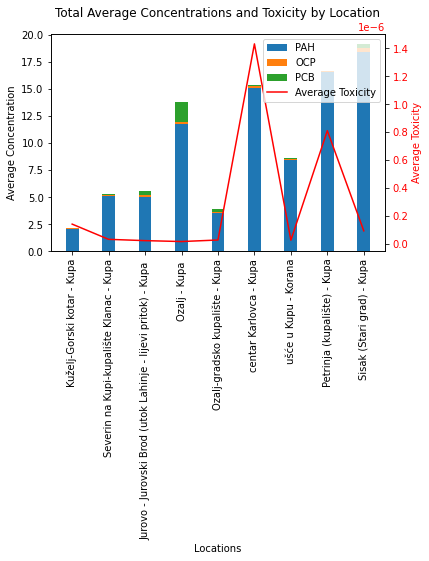

In [29]:
def plot_stacked_averages_with_toxicity(df_concentration, df_toxicity, locations, PAH_kol, OCP_kol, PCB_kol):
    # Filtriranje df samo za željene lokacije
    df_concentration_filtered = df_concentration.loc[locations]
    df_toxicity_filtered = df_toxicity.loc[locations]

    # Izračunavanje prosječnih koncentracija za svaku grupu spojeva
    avg_PAH = df_concentration_filtered[PAH_kol].mean(axis=1)
    avg_OCP = df_concentration_filtered[OCP_kol].mean(axis=1)
    avg_PCB = df_concentration_filtered[PCB_kol].mean(axis=1)
    
    # Izračunavanje ukupne prosječne toksičnosti za sve spojeve
    overall_avg_toxicity = df_toxicity_filtered.mean(axis=1)

    ind = np.arange(len(locations))  # x lokacije za grupe
    width = 0.35  # širina barova
    
    fig, ax1 = plt.subplots()

    # Crtanje barova za koncentracije
    ax1.bar(ind, avg_PAH, width, label='PAH')
    ax1.bar(ind, avg_OCP, width, bottom=avg_PAH, label='OCP')
    ax1.bar(ind, avg_PCB, width, bottom=avg_PAH+avg_OCP, label='PCB')
    
    ax1.set_xlabel('Locations')
    ax1.set_ylabel('Average Concentration')
    ax1.set_title('Total Average Concentrations and Toxicity by Location')
    ax1.set_xticks(ind)
    ax1.set_xticklabels(locations, rotation=90)
   # ax1.legend(loc='upper left')

    # Dodavanje sekundarne y-osi za toksičnost
    ax2 = ax1.twinx()
    ax2.plot(locations, overall_avg_toxicity, 'r-', label='Average Toxicity')
    ax2.set_ylabel('Average Toxicity', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Kombiniranje legendi
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    plt.show()

# Pozivanje funkcije
plot_stacked_averages_with_toxicity(df_concentration_transposed, df_toxicity_transposed, kupa_locations, PAH_kol, OCP_kol, PCB_kol)


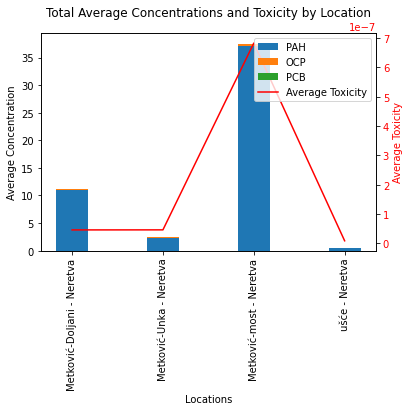

In [30]:
neretva_locations = [
    "Metković-Doljani - Neretva",
    "Metković-Unka - Neretva",
    "Metković-most - Neretva",
    "ušće - Neretva"
]

plot_stacked_averages_with_toxicity(df_concentration_transposed, df_toxicity_transposed, neretva_locations, PAH_kol, OCP_kol, PCB_kol)

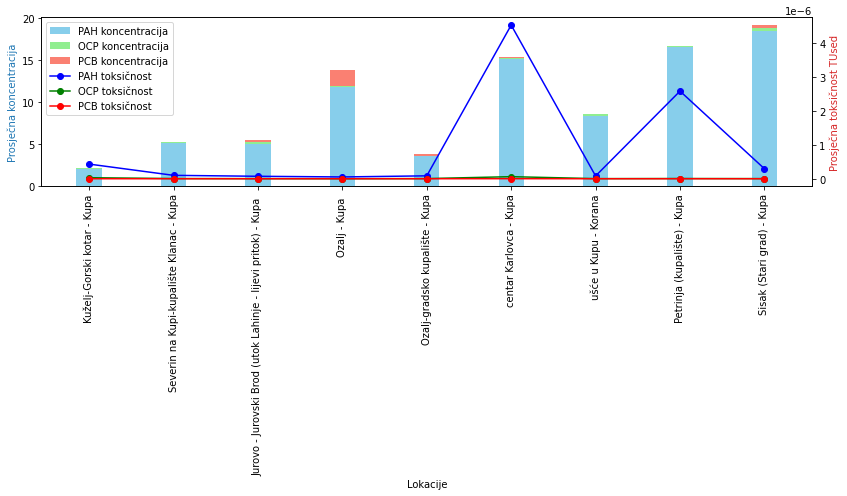

In [44]:
def plot_concentration_and_toxicity_stacked(df_concentration, df_toxicity, locations, PAH_kol, OCP_kol, PCB_kol):
    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Priprema indeksa x-osi za crtanje barova
    ind = np.arange(len(locations))
    width = 0.3  # širina barova

    # Inicijalizacija "dno" za stogovanje barova
    bottom = np.zeros(len(locations))

    # Crtanje stogovanih barova za koncentracije
    for group_kol, color, label in zip([PAH_kol, OCP_kol, PCB_kol], 
                                       ['skyblue', 'lightgreen', 'salmon'], 
                                       ['PAH koncentracija', 'OCP koncentracija', 'PCB koncentracija']):
        avg_concentration = df_concentration.loc[locations][group_kol].mean(axis=1)
        ax1.bar(ind, avg_concentration, width, bottom=bottom, label=label, color=color)
        bottom += avg_concentration  # Ažuriranje "dno" za sljedeću grupu

    # Crtanje linija za toksičnost
    ax2 = ax1.twinx()
    for group_kol, color, label, linestyle in zip([PAH_kol, OCP_kol, PCB_kol], 
                                                  ['blue', 'green', 'red'], 
                                                  ['PAH toksičnost', 'OCP toksičnost', 'PCB toksičnost'], 
                                                  ['-', '-', '-']):
        avg_toxicity = df_toxicity.loc[locations][group_kol].mean(axis=1)
        ax2.plot(locations, avg_toxicity, color=color, marker='o', linestyle=linestyle, label=label)

    ax1.set_xlabel('Lokacije')
    ax1.set_ylabel('Prosječna koncentracija', color='tab:blue')
    ax2.set_ylabel('Prosječna toksičnost TUsed', color='tab:red')
    ax1.set_xticks(ind)
    ax1.set_xticklabels(locations, rotation=90)

    # Kreiranje kombinirane legende za oba y-osa
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left', bbox_to_anchor=(0, 1))

    plt.tight_layout()
    

# Pretpostavljamo da su df_concentration i df_toxicity već filtrirani za 'kupa_locations'
# i da su PAH_kol, OCP_kol, i PCB_kol definirani s listama spojeva
plot_concentration_and_toxicity_stacked(df_concentration_transposed.loc[kupa_locations], df_toxicity_transposed.loc[kupa_locations], kupa_locations, PAH_kol, OCP_kol, PCB_kol)

plt.savefig('../../data/VEGA_QSAR_modeli/Kupa.svg', format='svg', bbox_inches='tight')

plt.show()
 

In [32]:
data=pd.read_csv('../../data/PCB_OCP_PAH_TOC_popis_sediment_ivana_1.csv',index_col=0)

In [33]:
df_toc = pd.DataFrame(data[['LOKACIJA','RIJEKA','TOC(%)']])

# Kombiniranje 'LOKACIJA' i 'RIJEKA' za stvaranje jedinstvenog identifikatora
df_toc['LOKACIJA_RIJEKA'] = df_toc['LOKACIJA'] + ' - ' + df_toc['RIJEKA']

# Postavljanje 'LOKACIJA_RIJEKA' kao novog indeksa
df_toc.set_index('LOKACIJA_RIJEKA', inplace=True)

# Opcionalno: Ako želite isključiti originalne kolone 'LOKACIJA' i 'RIJEKA' iz DataFrame-a
df_toc = df_toc[['TOC(%)']]

df_toc

TOC(%)
LOKACIJA_RIJEKA                                           
Kuželj-Gorski kotar - Kupa                            0.12
Iševnica- Gorski kotar - Kupica                       0.68
centar Karlovca - Kupa                                0.08
ušće u Kupu - Korana                                  2.19
Zagrebačka županija - Kupčina                         1.97
Stubičke Toplice - Vidak                              0.67
 Istra - Mirna                                        1.30
 Istra - Mala Huba                                    1.54
 Istra - Boljunčica                                   1.38
Jurovo - Jurovski Brod (utok Lahinje - lijevi p...    1.63
Ozalj - Kupa                                          4.34
Metković-Doljani - Neretva                            1.73
Metković-Unka - Neretva                               0.35
Metković-most - Neretva                               0.41
ušće - Neretva                                        0.50
Mijači - Orljava                                      0.55
Striježevica - Brzaja                                 0.15
Petrinja (kupalište) - Kupa                           0.15
Sisak (Stari grad) - Kupa                             1.67
Sisak (Stari grad) - Sava                             0.55
Zagreb (Savski Kamenji - toplana) - Sava              0.18
Prošćansko jezero - Plitvička jezera                  3.98
Belavići-kamp Slapić - Mrežnica                       2.85
Duga Resa-gradsko kupalište - Mrežnica                4.15
Severin na Kupi-kupalište Klanac - Kupa               1.19
Ozalj-gradsko kupalište - Kupa                        1.07
Slunj-kupalište Rastoke - Korana                      5.91
Karlovac-Foginovo kupalište - Korana                  1.45

In [34]:
# Inicijalizacija DataFrame-a za spremanje rezultata korelacije i p-vrijednosti
results = pd.DataFrame(index=df_concentration_transposed.columns, columns=['Spearman_Correlation', 'P-Value'])

# Provjera i prilagodba df_toc kako bi se osiguralo da koristi iste indekse kao df_concentration_transposed
df_toc_aligned = df_toc.reindex(df_concentration_transposed.index)

for compound in df_concentration_transposed.columns:
    # Izračun Spearmanove korelacije između TOC i koncentracije svakog spoja
    corr, p_value = spearmanr(df_concentration_transposed[compound], df_toc_aligned['TOC(%)'])

    # Spremanje rezultata u DataFrame
    results.loc[compound, 'Spearman_Correlation'] = corr
    results.loc[compound, 'P-Value'] = p_value

# Prikaz rezultata
print(results)


        Spearman_Correlation   P-Value
Flu                  0.04818  0.807649
Pir                 0.039693  0.841058
BaA                 0.056666  0.774567
Kri                 0.081851  0.678829
BjF                -0.095277  0.629612
BbF                 0.138516  0.482092
BkF                 0.037777  0.848642
BaP                 0.077481   0.69514
DahA               -0.006161  0.975178
BghiP               0.144265  0.463913
IP                   0.12565  0.524061
HCB                 0.180841  0.357093
α-HCH              -0.059129  0.765034
β-HCH              -0.095422  0.629089
γ-HCH               0.098275  0.618822
DDE                 0.085625   0.66485
DDD                  0.01206  0.951432
DDT                 0.101649   0.60677
PCB-28              0.097229  0.622578
PCB-52              0.227578  0.244146
PCB-101             0.082314  0.677106
PCB-118             0.173724  0.376642
PCB-153             0.137391  0.485694
PCB-138             0.134322  0.495582
PCB-180             0.010

/home/ivana/repozitorij/diplomski/ivana_dip/dipenv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [35]:
# Pretpostavimo da je df_toc vaš DataFrame sa TOC vrijednostima, s indeksom koji sadrži lokacije
# i df_concentration vaš DataFrame s koncentracijama spojeva, gdje su redovi spojevi, a stupci lokacije.

# Pretpostavimo da su lokacije u df_concentration_transposed već usklađene s lokacijama u df_toc

# Inicijalizacija praznog rječnika za spremanje rezultata
results = {}

# Iteracija kroz sve lokacije
for location in df_concentration_transposed.index:
    # Dohvaćanje koncentracija svih molekula za trenutnu lokaciju
    molecule_concentrations = df_concentration_transposed.loc[location]
    
    # Dohvaćanje TOC vrijednosti za trenutnu lokaciju
    toc_value = df_toc.loc[location, 'TOC(%)']
    
    # Inicijalizacija privremenog DataFrame-a za spremanje rezultata za trenutnu lokaciju
    temp_results = pd.DataFrame(index=df_concentration_transposed.columns, columns=['Spearman_Correlation', 'P-Value'])
    
    # Iteracija kroz sve molekule
    for molecule in df_concentration_transposed.columns:
        # Izračun Spearmanove korelacije između TOC i koncentracije molekule
        corr, p_value = spearmanr([toc_value], [molecule_concentrations[molecule]])
        
        # Spremanje rezultata u privremeni DataFrame
        temp_results.loc[molecule, 'Spearman_Correlation'] = corr if not np.isnan(corr) else 'N/A'  # Provjera za NaN
        temp_results.loc[molecule, 'P-Value'] = p_value if not np.isnan(p_value) else 'N/A'
    
    # Spremanje rezultata za trenutnu lokaciju u glavni rječnik
    results[location] = temp_results

# Sada možete pristupiti rezultatima za bilo koju lokaciju kao što je prikazano ispod
for location, res in results.items():
    print(f"Rezultati za {location}:")
    print(res, "\n")


Rezultati za Kuželj-Gorski kotar - Kupa:
        Spearman_Correlation P-Value
Flu                      N/A     N/A
Pir                      N/A     N/A
BaA                      N/A     N/A
Kri                      N/A     N/A
BjF                      N/A     N/A
BbF                      N/A     N/A
BkF                      N/A     N/A
BaP                      N/A     N/A
DahA                     N/A     N/A
BghiP                    N/A     N/A
IP                       N/A     N/A
HCB                      N/A     N/A
α-HCH                    N/A     N/A
β-HCH                    N/A     N/A
γ-HCH                    N/A     N/A
DDE                      N/A     N/A
DDD                      N/A     N/A
DDT                      N/A     N/A
PCB-28                   N/A     N/A
PCB-52                   N/A     N/A
PCB-101                  N/A     N/A
PCB-118                  N/A     N/A
PCB-153                  N/A     N/A
PCB-138                  N/A     N/A
PCB-180                  N/A     N

In [36]:
from scipy.stats import spearmanr

# Pretpostavljajući da df_toc i df_concentration_transposed imaju usklađene i odgovarajuće indekse
results = pd.DataFrame(index=df_concentration_transposed.columns, columns=['Spearman_Correlation', 'P-Value'])

for compound in df_concentration_transposed.columns:
    # Izračunavanje Spearmanove korelacije između svih TOC vrijednosti i koncentracija za svaku molekulu
    corr, p_value = spearmanr(df_toc['TOC(%)'], df_concentration_transposed[compound])
    
    # Spremanje rezultata
    results.at[compound, 'Spearman_Correlation'] = corr
    results.at[compound, 'P-Value'] = p_value

print(results)


        Spearman_Correlation   P-Value
Flu                  0.04818  0.807649
Pir                 0.039693  0.841058
BaA                 0.056666  0.774567
Kri                 0.081851  0.678829
BjF                -0.095277  0.629612
BbF                 0.138516  0.482092
BkF                 0.037777  0.848642
BaP                 0.077481   0.69514
DahA               -0.006161  0.975178
BghiP               0.144265  0.463913
IP                   0.12565  0.524061
HCB                 0.180841  0.357093
α-HCH              -0.059129  0.765034
β-HCH              -0.095422  0.629089
γ-HCH               0.098275  0.618822
DDE                 0.085625   0.66485
DDD                  0.01206  0.951432
DDT                 0.101649   0.60677
PCB-28              0.097229  0.622578
PCB-52              0.227578  0.244146
PCB-101             0.082314  0.677106
PCB-118             0.173724  0.376642
PCB-153             0.137391  0.485694
PCB-138             0.134322  0.495582
PCB-180             0.010

/home/ivana/repozitorij/diplomski/ivana_dip/dipenv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [37]:
# Sumiranje svih koncentracija molekula po lokacijama
df_concentration_transposed['Total_Concentration'] = df_concentration_transposed.sum(axis=1)


# Izračunavanje Spearmanove korelacije
corr, p_value = spearmanr(df_concentration_transposed['Total_Concentration'], df_toc['TOC(%)'])

print(f"Spearmanova korelacija između ukupnih koncentracija i TOC vrijednosti: {corr:.3f}")
print(f"P-vrijednost: {p_value:.3f}")


Spearmanova korelacija između ukupnih koncentracija i TOC vrijednosti: 0.103
P-vrijednost: 0.601


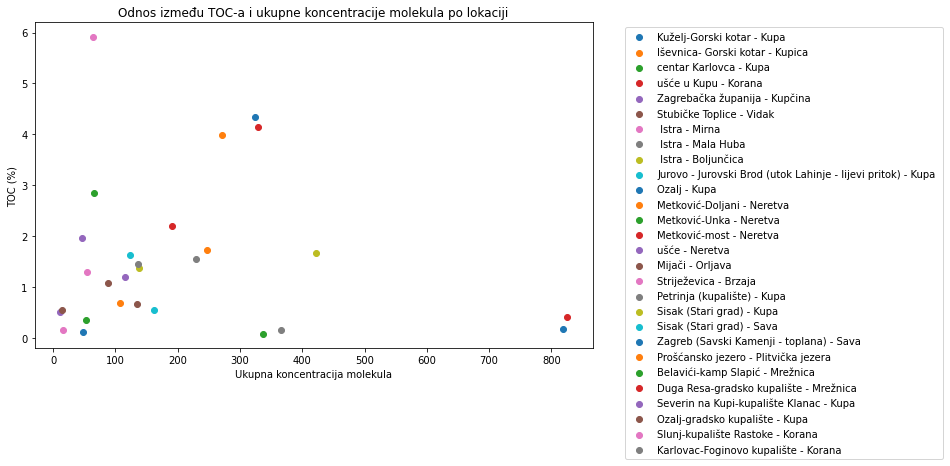

In [38]:
import matplotlib.pyplot as plt

# Izračunavanje ukupne koncentracije molekula za svaku lokaciju
df_concentration_transposed['Total_Concentration'] = df_concentration_transposed.sum(axis=1)

# Vizualizacija
plt.figure(figsize=(10, 6))
for location in df_concentration_transposed.index:
    plt.scatter(df_concentration_transposed.loc[location, 'Total_Concentration'], df_toc.loc[location, 'TOC(%)'], label=location)

plt.xlabel('Ukupna koncentracija molekula')
plt.ylabel('TOC (%)')
plt.title('Odnos između TOC-a i ukupne koncentracije molekula po lokaciji')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


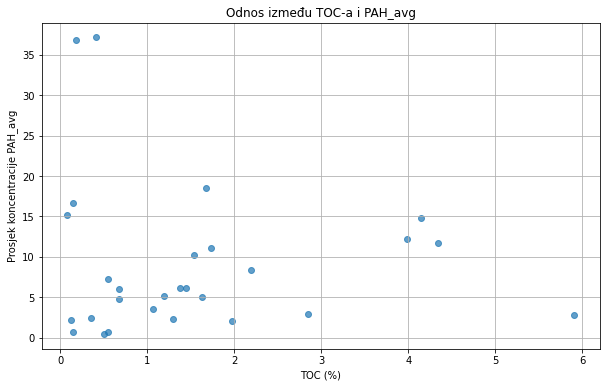

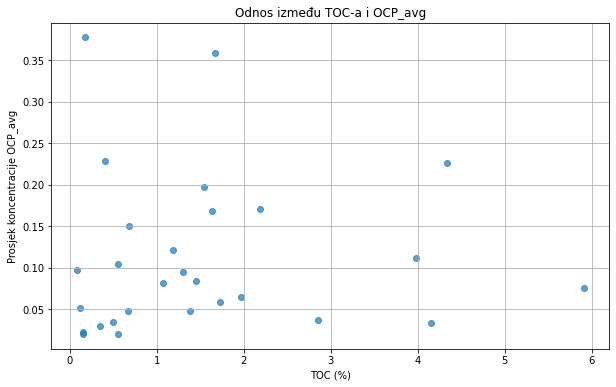

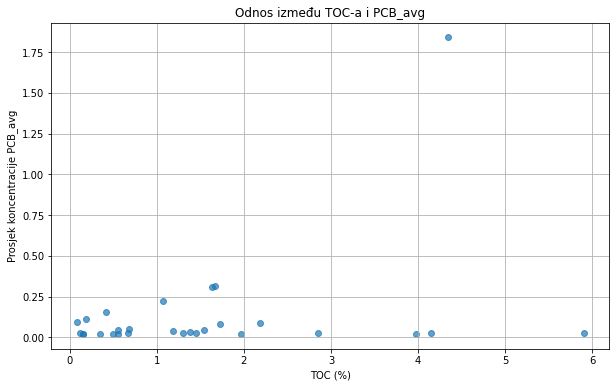

In [39]:
# Primjer kako bi to mogli učiniti:

df_concentration_transposed['PAH_avg'] = df_concentration_transposed[PAH_kol].mean(axis=1)
df_concentration_transposed['OCP_avg'] = df_concentration_transposed[OCP_kol].mean(axis=1)
df_concentration_transposed['PCB_avg'] = df_concentration_transposed[PCB_kol].mean(axis=1)


# Pretpostavimo da df_concentration_transposed već ima izračunate 'PAH_avg', 'OCP_avg', 'PCB_avg'
df_toc['TOC'] = df_toc['TOC(%)']  # Ako je potrebno, prilagodite ime stupca TOC-a

for compound_group in ['PAH_avg', 'OCP_avg', 'PCB_avg']:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_toc['TOC'], df_concentration_transposed[compound_group], alpha=0.7)
    plt.title(f'Odnos između TOC-a i {compound_group}')
    plt.xlabel('TOC (%)')
    plt.ylabel(f'Prosjek koncentracije {compound_group}')
    plt.grid(True)
    plt.show()


In [40]:
import plotly.express as px

# Pretpostavimo da df_concentration_transposed i df_toc već imaju sve potrebne podatke
# i da 'Location' sadrži imena lokacija
df_plot = df_concentration_transposed.reset_index().rename(columns={'index': 'Lokacija'})
df_plot['TOC'] = df_plot['Lokacija'].map(df_toc['TOC(%)'])  # Preslikavanje TOC vrijednosti na df_plot


# Za PAH prosječne koncentracije, gdje svaka lokacija ima svoju boju
fig_pah = px.scatter(df_plot, x='TOC', y='PCB_avg',
                     color='Lokacija', # Dodjeljuje različite boje za svaku lokaciju
                     hover_name='Lokacija', # Prikazuje ime lokacije prilikom prelaska mišem
                     title='Odnos između TOC-a i prosječne koncentracije PCB po lokaciji')
fig_pah.show()

# Ponovite za OCP i PCB mijenjajući 'y' u px.scatter(...) odgovarajuće



In [41]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Kreiranje figure s 3 reda i 1 stupcem
fig = make_subplots(rows=3, cols=1, vertical_spacing=0.1) #subplot_titles=("PAH", "OCP", "PCB")

# Definiranje kategorija boja
colors = px.colors.qualitative.Plotly

# Dodavanje zasebnog traga za svaku lokaciju za PAH, OCP, PCB
for i, location in enumerate(df_plot['Lokacija'].unique()):
    df_location = df_plot[df_plot['Lokacija'] == location]
    fig.add_trace(go.Scatter(x=df_location['TOC'], y=df_location['PAH_avg'], mode='markers', name=location,
                             marker=dict(color=colors[i % len(colors)])), row=1, col=1)
    fig.add_trace(go.Scatter(x=df_location['TOC'], y=df_location['OCP_avg'], mode='markers', name=location,
                             marker=dict(color=colors[i % len(colors)]), showlegend=False), row=2, col=1)
    fig.add_trace(go.Scatter(x=df_location['TOC'], y=df_location['PCB_avg'], mode='markers', name=location,
                             marker=dict(color=colors[i % len(colors)]), showlegend=False), row=3, col=1)

# Ažuriranje layouta
fig.update_layout(height=750, width=1200) #title_text="Odnos između TOC-a i prosječne koncentracije molekula po lokaciji")
fig.update_xaxes(title_text="TOC (%)", row=3, col=1)
fig.update_yaxes(title_text="Prosjek koncentracije PAH", row=1, col=1)
fig.update_yaxes(title_text="Prosjek koncentracije OCP", row=2, col=1)
fig.update_yaxes(title_text="Prosjek koncentracije PCB", row=3, col=1)

# Prikaz figure
fig.show()

pio.write_image(fig, '../../data/VEGA_QSAR_modeli/TOC.svg')

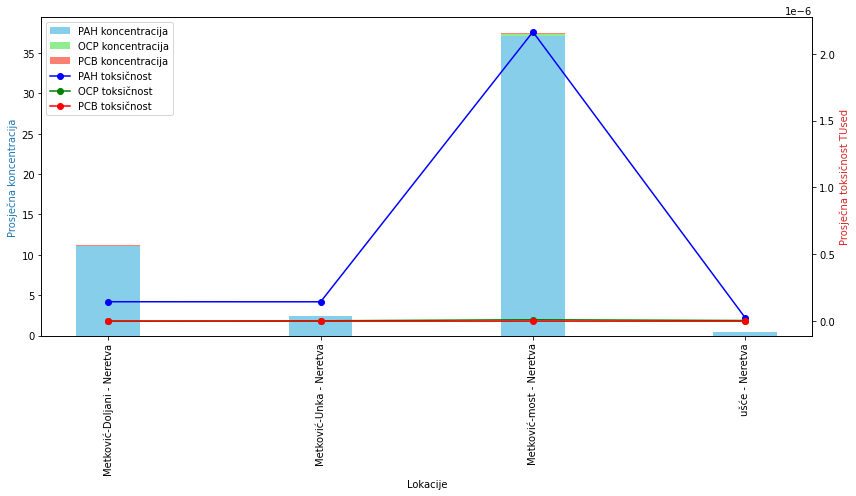

In [45]:
plot_concentration_and_toxicity_stacked(df_concentration_transposed.loc[neretva_locations], df_toxicity_transposed.loc[neretva_locations], neretva_locations, PAH_kol, OCP_kol, PCB_kol)
plt.savefig('../../data/VEGA_QSAR_modeli/Neretva.svg', format='svg', bbox_inches='tight')

plt.show()

In [43]:
def plot_data_for_locations_with_histogram(locations, avg_concentration, avg_toxicity, group_name):
    fig, ax1 = plt.subplots(figsize=(12, 7))
    
    # Postavljanje barova za prosječne koncentracije
    color = 'tab:blue'
    ax1.bar(locations, avg_concentration, color=color, label='Average Concentration', alpha=0.6)
    ax1.set_xlabel('Locations')
    ax1.set_ylabel('Average Concentration', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    # Stvaranje drugog y-osa za prosječne toksičnosti
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.plot(locations, avg_toxicity, color=color, marker='o', linestyle='-', label='Average Toxicity')
    ax2.set_ylabel('Average Toxicity', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title(f'Average Concentration and Toxicity for {group_name} by Location')
    fig.legend(loc="upper right", bbox_to_anchor=(1, 0.9))  # Prilagođavanje pozicije legende
    
    # Ovdje postavljamo x-ticks i rotiramo ih za bolju čitljivost
    ax1.set_xticks(np.arange(len(locations)))
    ax1.set_xticklabels(locations, rotation=90)
    
    plt.tight_layout()  # Pobrinite se da layout bude prilagođen prije postavljanja oznaka
    plt.show()

# Izračun prosječnih vrijednosti i crtanje histograma i linija za svaku grupu
for group_name, group_molecules in [('PAH', PAH_kol), ('OCP', OCP_kol), ('PCB', PCB_kol)]:
    avg_concentration = calculate_averages_for_group(df_concentration, group_molecules)
    avg_toxicity = calculate_averages_for_group(df_toxicity, group_molecules)
    plot_data_for_locations_with_histogram(locations, avg_concentration, avg_toxicity, group_name)


NameError: name 'calculate_averages_for_group' is not defined

In [ ]:
def calculate_group_averages(df, group_columns):
    """
    Izračunava ukupne prosječne vrijednosti za zadane stupce (grupu spojeva) unutar DataFrame-a.
    """
    # Sumiranje vrijednosti za grupu spojeva i dijeljenje s brojem spojeva u grupi
    group_sum = df[group_columns].sum(axis=1)
    avg_group = group_sum / len(group_columns)
    return avg_group

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Pretpostavimo da su df_concentration i df_toxicity već definirani DataFrame-ovi

def calculate_averages_for_group(df, group_molecules):
    """
    Izračunava prosječne vrijednosti za zadane molekule (grupu) unutar DataFrame-a.
    
    Args:
    - df (pd.DataFrame): DataFrame s podacima za izračun.
    - group_molecules (list): Lista molekula za koje se izračunava prosjek.
    
    Returns:
    - pd.Series: Serija s prosječnim vrijednostima za svaku lokaciju.
    """
    return df[group_molecules].mean(axis=1)

def plot_data_for_locations_with_histogram(locations, avg_concentration, avg_toxicity, group_name):
    fig, ax1 = plt.subplots(figsize=(12, 7))
    
    # Postavljanje barova za prosječne koncentracije
    color = 'tab:blue'
    ax1.bar(locations, avg_concentration, color=color, label='Average Concentration', alpha=0.6)
    ax1.set_xlabel('Locations')
    ax1.set_ylabel('Average Concentration', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    # Stvaranje drugog y-osa za prosječne toksičnosti
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.plot(locations, avg_toxicity, color=color, marker='o', linestyle='-', label='Average Toxicity')
    ax2.set_ylabel('Average Toxicity', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title(f'Average Concentration and Toxicity for {group_name} by Location')
    fig.legend(loc="upper right", bbox_to_anchor=(1, 0.9))  # Prilagođavanje pozicije legende
    
    # Ovdje postavljamo x-ticks i rotiramo ih za bolju čitljivost
    ax1.set_xticks(np.arange(len(locations)))
    ax1.set_xticklabels(locations, rotation=90)
    
    plt.tight_layout()  # Pobrinite se da layout bude prilagođen prije postavljanja oznaka
    plt.show()

# Pretpostavka: 'locations' je već definiran kao lista imena lokacija.
# Možete koristiti funkciju i petlju kako slijedi:

for group_name, group_molecules in [('PAH', PAH_kol), ('OCP', OCP_kol), ('PCB', PCB_kol)]:
    avg_concentration = calculate_averages_for_group(df_concentration, group_molecules)
    avg_toxicity = calculate_averages_for_group(df_toxicity, group_molecules)
    plot_data_for_locations_with_histogram(locations, avg_concentration, avg_toxicity, group_name)


In [ ]:
import matplotlib.pyplot as plt

def plot_grouped_histogram(locations, avg_concentration_PAH, avg_concentration_PCB, avg_concentration_OCP):
    # Širina bara za svaku grupu
    bar_width = 0.25
    
    # Postavljanje pozicija bara za svaku grupu
    r1 = np.arange(len(locations))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    
    # Crtanje bara za svaku grupu
    plt.figure(figsize=(12, 8))
    plt.bar(r1, avg_concentration_PAH, color='b', width=bar_width, edgecolor='grey', label='PAH')
    plt.bar(r2, avg_concentration_PCB, color='r', width=bar_width, edgecolor='grey', label='PCB')
    plt.bar(r3, avg_concentration_OCP, color='g', width=bar_width, edgecolor='grey', label='OCP')
    
    # Dodavanje legendi, naslova i oznaka
    plt.xlabel('Lokacije', fontweight='bold')
    plt.xticks([r + bar_width for r in range(len(locations))], locations, rotation=90)
    plt.ylabel('Prosječna koncentracija')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Pretpostavimo da je `locations` lista imena lokacija
plot_grouped_histogram(kupa_locations, avg_concentration_PAH, avg_concentration_PCB, avg_concentration_OCP)


In [ ]:
import matplotlib.pyplot as plt

def plot_data_for_locations_with_histogram(locations, avg_concentration, TU_site_average_rank, group_name):
    fig, ax1 = plt.subplots(figsize=(12, 7))
    
    # Crtanje histograma za prosječne koncentracije
    ax1.bar(locations, avg_concentration, color='tab:blue', label='Average Concentration', alpha=0.6)
    ax1.set_xlabel('Locations')
    ax1.set_ylabel('Average Concentration', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.tick_params(axis='x', rotation=90)
    
    # Stvaranje drugog y-osa za prosječne rangove toksičnosti
    ax2 = ax1.twinx()
    ax2.plot(locations, TU_site_average_rank, color='tab:red', marker='o', linestyle='-', label='Average Toxicity Rank')
    ax2.set_ylabel('Average Toxicity Rank', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title(f'Average Concentration and Toxicity Rank for {group_name} by Location')
    fig.tight_layout()
    plt.show()

# Pretpostavljajući da df_concentration_kupa ima isti redoslijed lokacija kao i TU_site
avg_concentration_kupa = df_concentration.mean(axis=1)  # prosjek po spojevima za svaku lokaciju
TU_site_average_rank = TU_site.loc[kupa_locations, 'TU_site_average_rank']

plot_data_for_locations_with_histogram(kupa_locations, avg_concentration_kupa[kupa_locations], TU_site_average_rank, "Kupa")


In [ ]:
# Transponiranje df_concentration tako da lokacije postanu indeksi
df_concentration_transposed = df_concentration.T

# Sada kada su lokacije indeksi, možete izračunati prosječne koncentracije
avg_concentration = df_concentration_transposed.mean(axis=1)  # prosjek po svim spojevima za svaku lokaciju

# Ako TU_site već koristi lokacije kao indekse, možete izravno dohvatiti TU_site_average_rank
# Pretpostavljamo da su kupa_locations imena koja se točno podudaraju s indeksima u TU_site i df_concentration_transposed
TU_site_average_rank = TU_site.loc[kupa_locations, 'TU_site_average_rank']

# Koristite prilagođenu funkciju za vizualizaciju
plot_data_for_locations_with_histogram(kupa_locations, avg_concentration.loc[kupa_locations], TU_site_average_rank, "Kupa")


In [ ]:
neretva_locations = [
    "Metković-Doljani - Neretva",
    "Metković-Unka - Neretva",
    "Metković-most - Neretva",
    "ušće - Neretva"
]

# Filtriranje DataFrame-a za koncentraciju i toksičnost koristeći definirane lokacije
df_concentration_neretva = df_concentration[neretva_locations]
df_toxicity_neretva = df_toxicity[neretva_locations]


# Izračunavanje prosječnih vrijednosti za filtrirane lokacije i crtanje grafikona
plot_data_for_locations_with_histogram(neretva_locations, df_concentration_neretva.mean(), df_toxicity_neretva.mean(), "Neretva")

In [ ]:

df_concentration_neretva = df_concentration_transposed.loc[neretva_locations].mean(axis=1)

# Izdvajanje transformiranih rangova toksičnosti za Neretvu
TU_site_average_rank_neretva = TU_site.loc[neretva_locations, 'TU_site_average_rank']
max_rank = TU_site_average_rank_neretva.max()
TU_site_average_rank_neretva_transformed = (max_rank + 1) - TU_site_average_rank_neretva

# Koristimo prilagođenu funkciju za vizualizaciju s transformiranim rangovima
plot_data_for_locations_with_histogram(neretva_locations, df_concentration_neretva, TU_site_average_rank_neretva, "Neretva")


In [ ]:
# Izračunavanje prosječnih koncentracija za svaku lokaciju
avg_concentration_OCP = df_concentration.loc[OCP_kol][kupa_locations].mean(axis=0)
avg_concentration_PCB = df_concentration.loc[PCB_kol][kupa_locations].mean(axis=0)

# Crtanje promjena koncentracija nizvodno duž rijeke Kupe
plt.figure(figsize=(14, 7))
plt.plot(kupa_locations, avg_concentration_OCP, marker='o', linestyle='-', color='green', label='Prosjek koncentracija OCP')
plt.plot(kupa_locations, avg_concentration_PCB, marker='^', linestyle='-', color='red', label='Prosjek koncentracija PCB')
plt.title("Promjena koncentracija OCP-a i PCB-a nizvodno duž rijeke Kupe")
plt.xlabel("Lokacije nizvodno")
plt.ylabel("Prosjek koncentracija")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Izračunavanje prosječnih koncentracija za svaku lokaciju
avg_concentration_OCP = df_concentration.loc[OCP_kol][neretva_locations].mean(axis=0)
avg_concentration_PCB = df_concentration.loc[PCB_kol][neretva_locations].mean(axis=0)
avg_concentration_PAH = df_concentration.loc[PAH_kol][neretva_locations].mean(axis=0)


# Crtanje promjena koncentracija nizvodno duž rijeke Kupe
plt.figure(figsize=(14, 7))
plt.plot(neretva_locations, avg_concentration_OCP, marker='o', linestyle='-', color='green', label='Prosjek koncentracija OCP')
plt.plot(neretva_locations, avg_concentration_PCB, marker='o', linestyle='-', color='red', label='Prosjek koncentracija PCB')
#plt.plot(neretva_locations, avg_concentration_PAH, marker='o', linestyle='-', color='blue', label='Prosjek koncentracija PAH')
plt.title("Promjena koncentracija OCP-a i PCB-a nizvodno duž rijeke Neretve")
plt.xlabel("Lokacije nizvodno")
plt.ylabel("Prosjek koncentracija")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.plot(neretva_locations, avg_concentration_PAH, marker='o', linestyle='-', color='blue', label='Prosjek koncentracija PAH')
plt.show()

In [ ]:

# Funkcija koja izračunava prosječne vrijednosti za određenu grupu spojeva
def calculate_averages_for_group(df, group_molecules):
    # Pretpostavka je da 'group_molecules' sadrži imena stupaca za određenu grupu spojeva
    return df[group_molecules].mean()

# Pretpostavimo da 'df_concentration' i 'df_toxicity' sadrže koncentracije i toksičnosti za sve lokacije i spojeve
# Pretpostavimo također da su 'PAH_kol', 'OCP_kol', i 'PCB_kol' liste s imenima relevantnih stupaca u DataFrame-u

# Lista s grupama spojeva i odgovarajućim kolonama
groups = [
    ('PAH', PAH_kol),
    ('OCP', OCP_kol),
    ('PCB', PCB_kol)
]

# Izračun prosječnih vrijednosti i crtanje histograma i linija za svaku grupu
for group_name, group_molecules in groups:
    avg_concentration = calculate_averages_for_group(df_concentration, group_molecules)
    avg_toxicity = calculate_averages_for_group(df_toxicity, group_molecules)
    plot_data_for_locations_with_histogram(kupa_locations, avg_concentration, avg_toxicity, group_name)


In [ ]:
def plot_histograms_for_group(df_concentration, df_toxicity, group_molecules, group_name):
    # Izračunavanje prosječnih vrijednosti za koncentraciju i toksičnost za grupu spojeva
    avg_concentration = calculate_averages_for_group(df_concentration, group_molecules)
    avg_toxicity = calculate_averages_for_group(df_toxicity, group_molecules)
    
    # Crtanje histograma
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # Histogram za prosječne koncentracije
    ax[0].bar(avg_concentration.index, avg_concentration.values, color='blue')
    ax[0].set_title(f'Average Concentration for {group_name}')
    ax[0].set_xlabel('Locations')
    ax[0].set_ylabel('Average Concentration')
    ax[0].tick_params(axis='x', rotation=90)
    
    # Histogram za prosječne toksičnosti
    ax[1].bar(avg_toxicity.index, avg_toxicity.values, color='red')
    ax[1].set_title(f'Average Toxicity for {group_name}')
    ax[1].set_xlabel('Locations')
    ax[1].set_ylabel('Average Toxicity')
    ax[1].tick_params(axis='x', rotation=90)
    
    plt.tight_layout()
    plt.show()

# Primjer kako crtatati histograme za svaku grupu spojeva
plot_histograms_for_group(df_concentration, df_toxicity, PAH_kol, "PAH")
plot_histograms_for_group(df_concentration, df_toxicity, OCP_kol, "OCP")
plot_histograms_for_group(df_concentration, df_toxicity, PCB_kol, "PCB")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_overall_averages(df_concentration, df_toxicity, locations):
    # Izračunavanje ukupnog prosjeka za koncentraciju i toksičnost za sve spojeve po lokacijama
    overall_avg_concentration = df_concentration.mean()
    overall_avg_toxicity = df_toxicity.mean()

    fig, ax1 = plt.subplots(figsize=(15, 7))

    # Konfiguracija osi za koncentraciju
    color = 'tab:blue'
    ax1.set_xlabel('Locations')
    ax1.set_ylabel('Overall Average Concentration', color=color)
    ax1.bar(locations, overall_avg_concentration, color=color, alpha=0.6, label='Concentration')
    ax1.tick_params(axis='y', labelcolor=color)

    # Dodavanje druge y-osi za toksičnost
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Overall Average Toxicity', color=color)
    ax2.plot(locations, overall_avg_toxicity, color=color, marker='o', linestyle='-', linewidth=2, markersize=12, label='Toxicity')
    ax2.tick_params(axis='y', labelcolor=color)

    # Dodavanje naslova i legendi
    plt.title('Overall Average Concentration and Toxicity by Location')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Ovdje postavljamo x-ticks i rotiramo ih
    ax1.set_xticks(np.arange(len(locations)))
    ax1.set_xticklabels(locations, rotation=90)  # Ovo osigurava da se oznake rotiraju pod kutem od 90 stupnjeva
    
    fig.tight_layout()  # Pobrinite se da layout bude prilagođen prije postavljanja oznaka
    plt.show() 

# Pretpostavljamo da su 'locations', 'df_concentration', i 'df_toxicity' već definirani
locations = df_concentration.columns.tolist()
plot_overall_averages(df_concentration, df_toxicity, locations)


In [ ]:
# Pretpostavljamo da su df_concentration i df_toxicity već definirani DataFrame-ovi
# Također pretpostavljamo da su PAH_kol, OCP_kol, PCB_kol liste definirane kao što ste naveli

# Filtriranje i vizualizacija za PAH spojeve
df_concentration_PAH = df_concentration[PAH_kol]
df_toxicity_PAH = df_toxicity[PAH_kol]
plot_overall_averages(df_concentration_PAH, df_toxicity_PAH, locations)

# Filtriranje i vizualizacija za OCP spojeve
df_concentration_OCP = df_concentration[OCP_kol]
df_toxicity_OCP = df_toxicity[OCP_kol]
plot_overall_averages(df_concentration_OCP, df_toxicity_OCP, locations)

# Filtriranje i vizualizacija za PCB spojeve
df_concentration_PCB = df_concentration[PCB_kol]
df_toxicity_PCB = df_toxicity[PCB_kol]
plot_overall_averages(df_concentration_PCB, df_toxicity_PCB, locations)


In [ ]:
# Pretpostavimo da imamo DataFrame 'df_concentration' s koncentracijama
# df_concentration = ...  # Ovdje bi bio vaš DataFrame s podacima

# Izračunavanje prosječnih koncentracija po lokacijama
avg_concentrations = df_concentration.mean(axis=0)

# Sortiranje prosječnih koncentracija od najveće prema najmanjoj
sorted_avg_concentrations = avg_concentrations.sort_values(ascending=False)

# Pretvaranje sortiranih prosječnih koncentracija u DataFrame za bolju preglednost
sorted_avg_concentrations_df = sorted_avg_concentrations.to_frame(name='Average Concentration')

# Prikaz tablice s prosječnim koncentracijama sortiranim od najviše prema najmanjoj
sorted_avg_concentrations_df


In [ ]:
# Izračunavanje prosječnih toksičnosti po lokacijama
avg_toxicities = df_toxicity.mean(axis=0)

# Sortiranje prosječnih toksičnosti od najveće prema najmanjoj
sorted_avg_toxicities = avg_toxicities.sort_values(ascending=False)

# Pretvaranje sortiranih prosječnih toksičnosti u DataFrame za bolju preglednost
sorted_avg_toxicities_df = sorted_avg_toxicities.to_frame(name='Average Toxicity')

sorted_avg_toxicities_df


In [ ]:
# Funkcija za izračunavanje prosječnih vrijednosti za svaku grupu i lokaciju
def calculate_averages(df, group_molecules):
    return df.loc[group_molecules].mean()

# Funkcija za crtanje
def plot_data_for_each_group(df_concentration, df_toxicity, locations):
    plt.figure(figsize=(20, 10))

    # Za svaku grupu molekula
    for group_name, group_molecules in [('PAH', PAH_kol), ('OCP', OCP_kol), ('PCB', PCB_kol)]:
        avg_concentration = calculate_averages(df_concentration, group_molecules)
        avg_toxicity = calculate_averages(df_toxicity, group_molecules)
        
        # Određujemo pozicije za svaku grupu kako bismo ih mogli razlikovati na istoj lokaciji
        positions = np.arange(len(locations)) + (0.2 * ['PAH', 'OCP', 'PCB'].index(group_name) - 0.2)
        
        plt.scatter(positions, avg_toxicity, s=avg_concentration*50, alpha=0.5, label=group_name)

    plt.xticks(ticks=np.arange(len(locations)), labels=locations, rotation=90)
    plt.ylabel('Average Toxicity')
    plt.xlabel('Location')
    plt.legend()
    plt.title('Average Toxicity and Concentration by Group and Location')
    plt.grid(True)
    plt.show()

# Pretpostavljamo da 'locations' sadrži imena lokacija
locations = df_concentration.columns.tolist()

# Crta graf za svaku grupu
plot_data_for_each_group(df_concentration, df_toxicity, locations)


In [ ]:
# Funkcija za izračunavanje prosječnih vrijednosti za svaku grupu i lokaciju
def calculate_averages(df, group_molecules):
    return df.loc[group_molecules].mean()

# Prilagođena funkcija za crtanje koja koristi PBT ocjene umjesto toksičnosti
def plot_data_for_each_group(df_concentration, df_PBT, locations):
    plt.figure(figsize=(15, 10))

    # Za svaku grupu molekula
    for group_name, group_molecules in [('PAH', PAH_kol), ('OCP', OCP_kol), ('PCB', PCB_kol)]:
        avg_concentration = calculate_averages(df_concentration, group_molecules)
        avg_PBT = calculate_averages(df_PBT, group_molecules)  # Koristimo prosječne PBT ocjene
        
        # Određujemo pozicije za svaku grupu kako bismo ih mogli razlikovati na istoj lokaciji
        positions = np.arange(len(locations)) + (0.2 * ['PAH', 'OCP', 'PCB'].index(group_name) - 0.2)
        
        plt.scatter(positions, avg_PBT, s=avg_concentration*40, alpha=0.6, label=group_name, zorder=3)  # PBT ocjene umjesto toksičnosti

    plt.xticks(ticks=np.arange(len(locations)), labels=locations, rotation=90)
    plt.ylabel('Average PBT Score')  # Promijenjeno u PBT ocjene
    plt.xlabel('Location')
    plt.legend()
    plt.title('Average PBT Score and Concentration by Group and Location')
    plt.grid(True, zorder=2)
    plt.tight_layout()
    

# Pretpostavljamo da 'locations' sadrži imena lokacija
locations = df_concentration.columns.tolist()

# Crta graf za svaku grupu
plot_data_for_each_group(df_concentration, df_PBT, locations)

plt.savefig('../../data/VEGA_QSAR_modeli/smlki.svg', dpi=1000)  
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def create_custom_heatmap(df_concentration, df_toxicity, locations, molecules):
    # Normalizacija podataka za veličinu točaka
    norm_concentration = (df_concentration - df_concentration.min()) / (df_concentration.max() - df_concentration.min())
    
    # Normalizacija toksičnosti za boju
    norm_toxicity = (df_toxicity - df_toxicity.min()) / (df_toxicity.max() - df_toxicity.min())
    
    fig, ax = plt.subplots(figsize=(12, 12))
    
    # Kreiranje scatter plot-a za svaku lokaciju i spoj
    for i, molecule in enumerate(molecules):
        for j, location in enumerate(locations):
            # Veličina točke bazirana na normaliziranoj koncentraciji
            size = norm_concentration.loc[molecule, location] * 1000  # Prilagodite faktor skaliranja
            # Boja točke bazirana na normaliziranoj toksičnosti
            color = plt.cm.viridis(norm_toxicity.loc[molecule, location])
            
            ax.scatter(j, i, s=size, color=color, edgecolors='w')
    
    ax.set_xticks(np.arange(len(locations)))
    ax.set_xticklabels(locations, rotation=90, ha="right")
    ax.set_yticks(np.arange(len(molecules)))
    ax.set_yticklabels(molecules)
    ax.set_xlabel('Location')
    ax.set_ylabel('Molecule')
    ax.set_title('Custom Heatmap: Toxicity (Color) & Concentration (Size)')
    
    plt.tight_layout()
    plt.show()

# Pretpostavljamo da 'locations' i 'molecules' već sadrže odgovarajuće podatke
locations = df_concentration.columns.tolist()
molecules = df_concentration.index.tolist()

create_custom_heatmap(df_concentration, df_toxicity, locations, molecules)
